# Summary

3 种模型在 2 个数据集上的运行时间 & 正确率数据汇总如下：

| 模型 | MNIST 数据集 | CIFAR10 数据集 |
| -- | -- | -- |
| 单层 softmax | 6s, 92% | 30s, 34% |
| 3 层全连接 | / | 57s, 37% |
| AlexNet | 8s, 97% | 3min, 70%|

观点：

1. 单层 softmax 和 3 层全连接，在 cifar10 上性能飞掉，基本不具备实用价值。
2. AlexNet 在 cifar10 上展示了 CNN 网络的潜力。70% 的正确率，在容错率较高的场景下，具备一定的使用价值。

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import time

tf.__version__

'2.1.0'

# 单层 softmax 模型

测试在 MNIST & cifar 数据集上到效果。作为后续测试的基准数据。

- timecost: ~6s
- accuracy: 92%

## MNIST 数据集 - 1 Layer softmax

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
y_train.shape

(60000,)

In [4]:
N, W, H = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H)),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.4661 - accuracy: 0.8785
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.3040 - accuracy: 0.9154
Epoch 3/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2834 - accuracy: 0.9205
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.2730 - accuracy: 0.9241
Epoch 5/5
10000/10000 [==============================] - 0s 15us/sample - loss: 0.2689 - accuracy: 0.9248
!! Total timecost: 5.97s


## CIFAR10 数据集 -- 1 Layer softmax

相同的模型，相比于 MNIST 数据集，处理时间从 6s 到 30s，准确率从 92%。

模型基本不能用了

- timecost: ~30s
- accuracy: 34%

In [5]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
N, W, H, C = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H, C)),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=20)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 31us/sample - loss: 1.9562 - accuracy: 0.3214
Epoch 2/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8866 - accuracy: 0.3500
Epoch 3/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8544 - accuracy: 0.3636
Epoch 4/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8397 - accuracy: 0.3691
Epoch 5/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8292 - accuracy: 0.3732
Epoch 6/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8289 - accuracy: 0.3747
Epoch 7/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8100 - accuracy: 0.3822
Epoch 8/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8186 - accuracy: 0.3801
Epoch 9/20
50000/50000 [==============================] - 1s 29us/sample - loss: 1.8018 - accuracy

## 3 层全连接模型

只验证在 cifar10 数据集上的效果，即可看出，提升很有限。

正确率从 34% 提高到 37%，依旧是不能用的数字。处理时间从 30s 增加到 57s，基本翻倍。

- timecost: ~57s
- accuracy: 37%

In [7]:
N, W, H, C = x_train.shape
N_LABELS = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(W, H, C)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1000, activation='relu'),
  tf.keras.layers.Dense(N_LABELS, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

model.fit(x_train, y_train, epochs=20)
model.evaluate(x_test, y_test)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 59us/sample - loss: 1.8808 - accuracy: 0.3087
Epoch 2/20
50000/50000 [==============================] - 3s 56us/sample - loss: 1.7541 - accuracy: 0.3637
Epoch 3/20
50000/50000 [==============================] - 3s 56us/sample - loss: 1.7124 - accuracy: 0.3788
Epoch 4/20
50000/50000 [==============================] - 3s 56us/sample - loss: 1.6888 - accuracy: 0.3879
Epoch 5/20
50000/50000 [==============================] - 3s 56us/sample - loss: 1.6652 - accuracy: 0.3974
Epoch 6/20
50000/50000 [==============================] - 3s 56us/sample - loss: 1.6537 - accuracy: 0.4005
Epoch 7/20
50000/50000 [==============================] - 3s 56us/sample - loss: 1.6454 - accuracy: 0.4057
Epoch 8/20
50000/50000 [==============================] - 3s 56us/sample - loss: 1.6361 - accuracy: 0.4086
Epoch 9/20
50000/50000 [==============================] - 3s 56us/sample - loss: 1.6255 - accuracy

# AlexNet -- 简单又经典的入门级 CNN 模型

In [8]:
help(layers.Conv2D)

Help on class Conv2D in module tensorflow.python.keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x

## Cifar 数据集合

相比于 3 个全连接层，AlexNet 的准确率从 37% 提高到 70%，接近一倍。处理时间从 1min 到 3min，增加 3 倍。

模型的性能，明显提升。达到了有一定使用价值的水平。

- timecost: ~188s (3min)
- accuracy: 70%

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print('!! start time counting')
tic = time.time()

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))
model.evaluate(x_test, y_test, verbose=2)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 379us/sample - loss: 1.5137 - accuracy: 0.4511 - val_loss: 1.2534 - val_accuracy: 0.5496
Epoch 2/10
50000/50000 [==============================] - 19s 373us/sample - loss: 1.1523 - accuracy: 0.5938 - val_loss: 1.0748 - val_accuracy: 0.6230
Epoch 3/10
50000/50000 [==============================] - 19s 373us/sample - loss: 1.0124 - accuracy: 0.6428 - val_loss: 0.9973 - val_accuracy: 0.6474
Epoch 4/10
50000/50000 [==============================] - 19s 373us/sample - loss: 0.9237 - accuracy: 0.6730 - val_loss: 0.9718 - val_accuracy: 0.6590
Epoch 5/10
50000/50000 [==============================] - 19s 373us/sample - loss: 0.8458 - accuracy: 0.7028 - val_loss: 0.9199 - val_accuracy: 0.6800
Epoch 6/10
50000/50000 [==============================] - 19s 372us/sample - loss: 0.7895 - accuracy: 0.7238 - val_loss: 0.9056 - val_accuracy: 0.6871
Epoch 7/10
50000/5000

10000/10000 - 1s - loss: 0.8796 - accuracy: 0.7051
0.7051


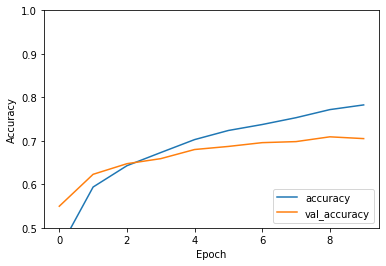

In [10]:
# train vs evaluate 的 accuracy 曲线
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

## MNIST 数据集合

相比于单层 softmax，处理时间从 6s 到 8s，增加 30%，正确率从 92% 到 97%，模型性能提升较为明显。

- timecost: ~8s
- accuracy: 97%

In [11]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print('!! start time counting')
tic = time.time()

history = model.fit(x_train, y_train, epochs=5, 
                    validation_data=(x_test, y_test))
model.evaluate(x_test, y_test, verbose=2)
toc = time.time()
print('!! Total timecost: %.2fs' % (toc - tic))

!! start time counting
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3978 - accuracy: 0.8825 - val_loss: 0.1686 - val_accuracy: 0.9494
Epoch 2/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.2269 - accuracy: 0.9331 - val_loss: 0.1241 - val_accuracy: 0.9615
Epoch 3/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1900 - accuracy: 0.9430 - val_loss: 0.1051 - val_accuracy: 0.9677
Epoch 4/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1660 - accuracy: 0.9505 - val_loss: 0.0970 - val_accuracy: 0.9716
Epoch 5/5
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1513 - accuracy: 0.9539 - val_loss: 0.0905 - val_accuracy: 0.9725
10000/10000 - 0s - loss: 0.0905 - accuracy: 0.9725
!! Total timecost: 8.09s
